In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Display Training & Test data (top & bottom five datasets)

In [45]:
#load the csv file
train_data = pd.read_csv('train_data_after_preprocess.csv')
test_data = pd.read_csv('test_data_after_preprocess.csv')

In [46]:
train_data.shape

(63874, 29)

In [47]:
test_data.shape

(9043, 29)

In [48]:
train_data.head()

,housing,loan,default,age_1,age_2,age_3,marital_married,marital_single,job_blue-collar,job_entrepreneur,...,education_tertiary,contact_telephone,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,-0.645275,0.45035,-1.728912,4.961712,-0.420772,0
1,1,0,0,0,1,0,1,0,0,0,...,1,1,0,0,-0.538652,0.45035,0.762074,-0.173538,-0.420772,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,-0.369329,0.45035,-0.972209,2.939376,-0.420772,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,-0.077591,0.45035,-1.019112,-0.802554,-0.420772,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,-0.393144,0.45035,0.429922,-0.173538,-0.420772,1


In [49]:
test_data.head()

,housing,loan,default,age_1,age_2,age_3,marital_married,marital_single,job_blue-collar,job_entrepreneur,...,education_tertiary,contact_telephone,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,1,0,0,0,1,0,1,0,0,0,...,1,1,0,0,-0.353943,0.46161,0.033731,-0.811596,-0.435061,0
1,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,3.367438,0.46161,-0.425208,-0.170094,-0.435061,0
2,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,-0.112356,0.46161,-0.002151,-0.811596,-0.435061,0
3,0,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0.064959,0.46161,-1.512344,0.322148,-0.435061,0
4,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,1.839344,0.46161,2.413680,-0.170094,-0.435061,1


In [50]:
#creating X,Y train and test data
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

In [51]:
### Checking Training Data and Testing Data dimensions
count_train = np.unique(y_train, return_counts=True)  # np.unique: numpy, find the unique elements of an array
count_test = np.unique(y_test, return_counts=True)

## DTs for Classification

In [52]:
from sklearn import tree
from sklearn import metrics

In [53]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

### Without any hyperparameter tunning, the model gives an accuracy of 0.752

In [60]:
y_pred = clf.predict(x_test)
print("Accuracy of the Decision Tree with processed Data:",metrics.accuracy_score(y_test, y_pred))

Accuracy of the Decision Tree with processed Data: 0.7501935198496075


## Hyperparameter Tuning
### Next we try to tune the maximum depth of the tree to decide the optimal maximum depth of the tree that gives the highest accuracy

In [76]:
Accu =[]  # This will store accuracy for different depth, [] define an empty list
for k in range(1,20): # k is depth of tree, starting from 1 to 10
    clf = tree.DecisionTreeClassifier(max_depth = k)
    # Train Decision Tree Classifer
    clf = clf.fit(x_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(x_test)
    accuracy_k =  metrics.accuracy_score(y_test, y_pred)
    Accu.append(accuracy_k) 
    print("Dept=", k)
    print("Accuracy:\n",accuracy_k)
    print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
    print("\n")    

Dept= 1
Accuracy:
 0.6313170408050426
Confusion Matrix: [[4851 3134]
 [ 200  858]]


Dept= 2
Accuracy:
 0.596925798960522
Confusion Matrix: [[4481 3504]
 [ 141  917]]


Dept= 3
Accuracy:
 0.7927678867632423
Confusion Matrix: [[6392 1593]
 [ 281  777]]


Dept= 4
Accuracy:
 0.7772862987946478
Confusion Matrix: [[6202 1783]
 [ 231  827]]


Dept= 5
Accuracy:
 0.7832577684396771
Confusion Matrix: [[6247 1738]
 [ 222  836]]


Dept= 6
Accuracy:
 0.8094658852150834
Confusion Matrix: [[6532 1453]
 [ 270  788]]


Dept= 7
Accuracy:
 0.7814884441004092
Confusion Matrix: [[6220 1765]
 [ 211  847]]


Dept= 8
Accuracy:
 0.7989605219506801
Confusion Matrix: [[6411 1574]
 [ 244  814]]


Dept= 9
Accuracy:
 0.7990711047218844
Confusion Matrix: [[6397 1588]
 [ 229  829]]


Dept= 10
Accuracy:
 0.7877916620590512
Confusion Matrix: [[6308 1677]
 [ 242  816]]


Dept= 11
Accuracy:
 0.7693243392679421
Confusion Matrix: [[6127 1858]
 [ 228  830]]


Dept= 12
Accuracy:
 0.7692137564967378
Confusion Matrix: [[6154 

In [66]:
# List of accuracy from max_depth = 1 to 20
Accu

[0.6313170408050426,
 0.596925798960522,
 0.7927678867632423,
 0.7772862987946478,
 0.7832577684396771,
 0.8094658852150834,
 0.7810461130155921,
 0.7989605219506801,
 0.799845184120314,
 0.7879022448302554,
 0.7685502598695123,
 0.768882008183125,
 0.7610306314276236,
 0.7591507243171514,
 0.757160234435475,
 0.7570496516642707,
 0.7563861550370452,
 0.7512993475616498,
 0.7542850823841646]

Text(0, 0.5, 'Accuracies')

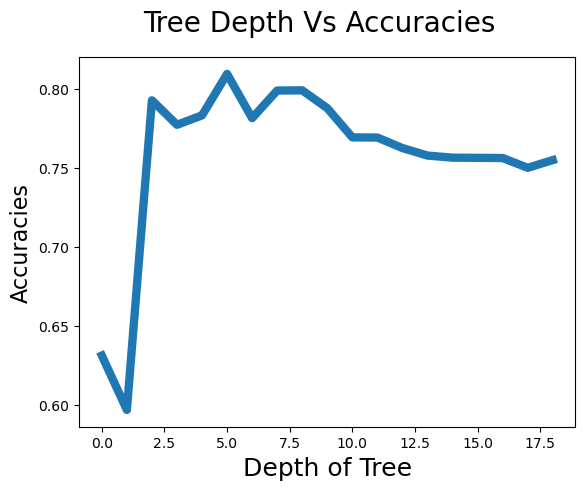

In [77]:
# Plot the relationship graphs
fig = plt.figure()
plt.plot(Accu, linewidth=6)
fig.suptitle('Tree Depth Vs Accuracies', fontsize=20)
plt.xlabel('Depth of Tree', fontsize=18)
plt.ylabel('Accuracies', fontsize=16)

In [78]:
#Maximum accuracy
print('Maximum depth value with the highest accuracy: ',1 + Accu.index(max(Accu)))
print('Maximum Accuracy:',"%.4f" % max(Accu))

Maximum depth value with the highest accuracy:  6
Maximum Accuracy: 0.8095


### Summary: Upon Inspection, we found out that at max_depth = 6, the model gives the highest accuracy (accu = 0.8095), thus we decided to use decision tree with max_depth = 6 to train the datasets

In [79]:
# Final Model
clf = tree.DecisionTreeClassifier(max_depth = 6)

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

## Model Evaluation

In [80]:
#Plot Tree
fig, ax = plt.subplots(figsize=(200, 200))
tree.plot_tree(clf, fontsize=60)
plt.show()

### Training Performance

In [81]:
# Cross Validation Method - 10 folds validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
print ("OOB_SCORE=", "%.4f" % max(Accu))  # keep 4 decimal placce

cv_score = cross_val_score(clf, x_train, y_train, cv=10)
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

OOB_SCORE= 0.8095
[0.78 0.82 0.84 0.83 0.84 0.83 0.83 0.83 0.84 0.84]
Ten-fold Cross Validation Score= 0.8278


### Testing Performance

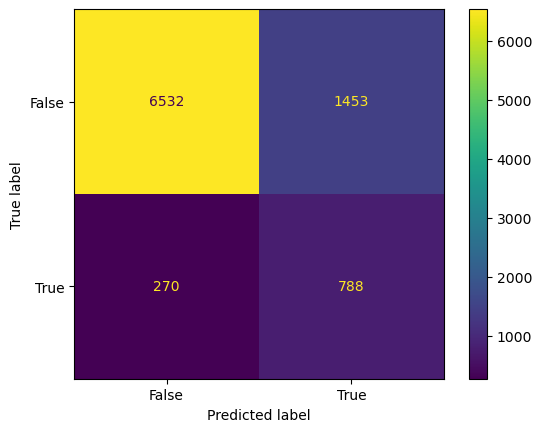

In [82]:
#Confusion Metrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [83]:
# Metrics evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy of the Decision Tree with Max_Depth = 6:",max(Accu))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of the Decision Tree with Max_Depth = 6: 0.8094658852150834
[[6532 1453]
 [ 270  788]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      7985
           1       0.35      0.74      0.48      1058

    accuracy                           0.81      9043
   macro avg       0.66      0.78      0.68      9043
weighted avg       0.89      0.81      0.84      9043

